In [1]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

num_simulation = 3000
assets = ['AAPL','CMCSA','VTI','VUG','VYM','VHT','COST','VDC']
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1')['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
Date,,,,,,,,
2019-01-02,38.277523,32.375896,121.519753,131.077332,70.912544,151.240051,194.150757,121.085365
2019-01-03,34.464806,32.630226,118.703667,127.065628,69.623558,147.823166,190.035645,120.214386
2019-01-04,35.936081,33.732353,122.632851,132.121735,71.647812,152.528564,195.554062,122.799522
2019-01-07,35.856087,33.374397,123.869659,133.468689,71.992752,153.883820,196.274689,122.688354
2019-01-08,36.539619,33.647568,125.144493,135.098724,72.582794,155.535034,197.744385,123.855843


In [4]:
pf_data.tail() #check companies still open and public at ending date

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
Date,,,,,,,,
2022-02-10,172.119995,48.919998,227.350006,288.429993,112.180000,247.369995,518.479980,194.850006
2022-02-11,168.639999,47.619999,222.940002,279.489990,111.389999,243.779999,509.670013,194.220001
2022-02-14,168.880005,47.400002,222.119995,279.859985,110.550003,241.330002,506.559998,193.809998
2022-02-15,172.789993,48.049999,226.070007,286.239990,111.550003,244.649994,513.919983,194.449997
2022-02-16,170.970001,47.985001,224.460007,282.945007,111.375999,242.660004,503.119995,193.586594


<AxesSubplot:xlabel='Date'>

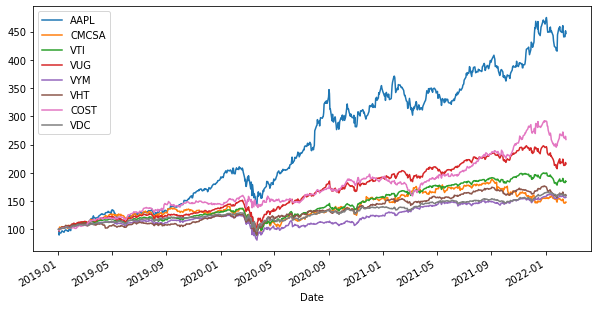

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

AAPL     0.474818
CMCSA    0.124833
VTI      0.194677
VUG      0.244120
VYM      0.143231
VHT      0.149998
COST     0.302092
VDC      0.148867
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
AAPL,0.114775,0.046036,0.058997,0.070147,0.045541,0.047141,0.043022,0.036538
CMCSA,0.046036,0.078350,0.043777,0.042838,0.043386,0.035025,0.028326,0.033638
VTI,0.058997,0.043777,0.050590,0.052379,0.045341,0.041496,0.030665,0.033328
VUG,0.070147,0.042838,0.052379,0.059780,0.041964,0.043135,0.035751,0.032586
VYM,0.045541,0.043386,0.045341,0.041964,0.047010,0.037803,0.026352,0.034335
VHT,0.047141,0.035025,0.041496,0.043135,0.037803,0.043116,0.027325,0.029472
COST,0.043022,0.028326,0.030665,0.035751,0.026352,0.027325,0.048928,0.027326
VDC,0.036538,0.033638,0.033328,0.032586,0.034335,0.029472,0.027326,0.032732


In [9]:
log_returns.corr() #get correlation between each pair.

,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
AAPL,1.000000,0.485463,0.774243,0.846855,0.619985,0.670123,0.574101,0.596121
CMCSA,0.485463,1.000000,0.695335,0.625934,0.714881,0.602618,0.457500,0.664243
VTI,0.774243,0.695335,1.000000,0.952461,0.929739,0.888492,0.616352,0.819005
VUG,0.846855,0.625934,0.952461,1.000000,0.791598,0.849642,0.661044,0.736655
VYM,0.619985,0.714881,0.929739,0.791598,1.000000,0.839681,0.549465,0.875287
VHT,0.670123,0.602618,0.888492,0.849642,0.839681,1.000000,0.594934,0.784522
COST,0.574101,0.457500,0.616352,0.661044,0.549465,0.594934,1.000000,0.682831
VDC,0.596121,0.664243,0.819005,0.736655,0.875287,0.784522,0.682831,1.000000


### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [10]:
num_assets = len(assets)
pfolio_returns = []
pfolio_volatilities = []

w_lst = []

for i in range(num_assets):
    w_lst.append([])

# Followig generate the simulation
for x in range (num_simulation):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    for i in range(num_assets):
        w_lst[i].append(weights[i])

    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

for i in range(num_assets):
    w_lst[i] = np.array(w_lst[i])

# pfolio_returns, pfolio_volatilities, w_lst[0], w_lst[1], w_lst[2]

In [11]:
# build simulated portfolios.
df_build = {'Return': pfolio_returns, 'Volatility': pfolio_volatilities}
for w in range(num_assets):
    df_build[assets[w]] = w_lst[w]
portfolios = pd.DataFrame(df_build)

In [12]:
portfolios.head() #checking to see if any error

,Return,Volatility,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
0,0.223376,0.203182,0.098774,0.013930,0.240423,0.060554,0.219758,0.116882,0.176037,0.073642
1,0.220708,0.194541,0.120445,0.042956,0.024957,0.058877,0.232288,0.066450,0.183369,0.270658
2,0.227106,0.218927,0.169171,0.171530,0.040742,0.232777,0.240752,0.028143,0.029410,0.087476
3,0.252616,0.211249,0.192769,0.104056,0.187417,0.011864,0.219271,0.050690,0.227633,0.006299
4,0.222502,0.205571,0.091608,0.071628,0.190773,0.211467,0.092711,0.045395,0.111511,0.184906


In [13]:
portfolios.tail() #checking to see if any error

,Return,Volatility,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
2995,0.232047,0.204886,0.112093,0.121889,0.208985,0.129153,0.014719,0.101965,0.180548,0.130649
2996,0.256380,0.222526,0.203794,0.225623,0.190841,0.145497,0.010721,0.058551,0.155990,0.008982
2997,0.230927,0.219228,0.184882,0.198814,0.015427,0.206143,0.132688,0.180886,0.044226,0.036934
2998,0.240449,0.207653,0.161802,0.083371,0.155226,0.107475,0.047408,0.179917,0.153771,0.111029
2999,0.238947,0.206684,0.160394,0.139476,0.140954,0.055241,0.154957,0.055696,0.197378,0.095904


In [14]:
portfolios.sort_values(by=['Volatility']) # Sort by volatility. Theoretically the portfolio with lowest valatility is the best one.

,Return,Volatility,AAPL,CMCSA,VTI,VUG,VYM,VHT,COST,VDC
1668,0.196219,0.185114,0.006813,0.038519,0.037719,0.061824,0.125499,0.232665,0.253774,0.243187
2211,0.198253,0.186317,0.039751,0.091852,0.087544,0.028961,0.059571,0.148981,0.209071,0.334269
1927,0.207259,0.187361,0.035406,0.009415,0.063995,0.094612,0.014824,0.275780,0.227806,0.278163
1143,0.184668,0.188665,0.002806,0.143798,0.111407,0.029273,0.098576,0.192049,0.200942,0.221150
1165,0.209276,0.188705,0.050777,0.068459,0.053496,0.009158,0.231510,0.076786,0.283233,0.226581
...,...,...,...,...,...,...,...,...,...,...
907,0.322304,0.234766,0.385878,0.002911,0.033162,0.151193,0.045277,0.085097,0.208639,0.087844
2217,0.314775,0.236531,0.365688,0.038250,0.025940,0.191779,0.062788,0.119072,0.185312,0.011170
979,0.276983,0.237632,0.345585,0.299509,0.059755,0.110935,0.004718,0.056982,0.060882,0.061634
877,0.282531,0.238218,0.296613,0.040638,0.125846,0.295597,0.120747,0.047066,0.030452,0.043041


Text(0, 0.5, 'Expected Return')

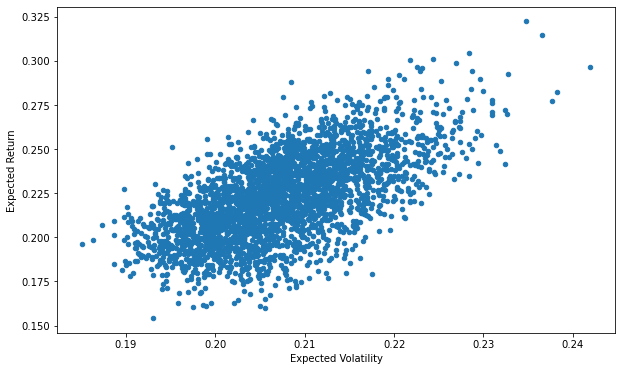

In [15]:
# check the plot
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [16]:
#generate path and name then export
path = 'results/'
name = '_'.join(assets)
path_name = path + name  + '.csv'
portfolios.sort_values(by=['Volatility']).to_csv(path_name)

In [17]:
# calculation & output
path_name2 = 'txt_results/' + name + '.txt'
f = open(path_name2, "a")

print("money amount calculation for demo use only, please don't simply invest on this results alone.", file=f)

sorted_portfolios = portfolios.sort_values(by=['Volatility']).head(1)

total_investment = 25000
print("Intend to invest ${:.2f}".format(total_investment) + " total.", file=f)

money_inv = []
for i in range(num_assets):
    inv = total_investment * sorted_portfolios[assets[i]].iloc[0]
    money_inv.append(inv)
    print("\t{:.0f}".format(money_inv[i] // pf_data.iloc[-1][i]) + " shares should long in ticker:" + assets[i], file=f)
    print("\t price @ ${:.2f} per share".format(pf_data.iloc[-1][i]), file=f)
    print("\t invest in " + assets[i] + " for ${:.2f}".format(inv) + ".", file=f)
    print("\t  represents {:.1f}% of total investment".format(sorted_portfolios[assets[i]].iloc[0] * 100), file=f)
    
print("Expected annual portfolio return is {:.1f}".format(sorted_portfolios['Return'].iloc[0]*100) + "%", file=f)
print("Expected annual portfolio volatility is {:.1f}".format(sorted_portfolios['Volatility'].iloc[0]*100) + "%", file=f)

f.close()